# Therapy Music Recommendation System

Many people use music to manage their mental health and emotional well-being, but choosing the right music can be challenging.

Using this dataset, we can build a model that recommends music genres and listening habits based on a person's mental health goals and current state.


Dataset: Music and Mental Health Dataset - 33 columns, 736 rows
https://www.openml.org/search?type=data&status=any&id=46348

Build 
- Predictive model
- Recommendation system
- Web service

# 1. Exploratory Data Analysis

## 1.1 Data Loading and Preprocessing

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport


In [2]:
df = pd.read_csv('dataset_.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Auto eda report
#profile = ProfileReport(df, title="Dataset Profiling Report")
#profile.to_file("eda_report.html")

In [4]:
import webbrowser
webbrowser.open('eda_report.html')

True

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           736 non-null    object 
 2   Primary streaming service     736 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 736 non-null    object 
 5   Instrumentalist               736 non-null    object 
 6   Composer                      736 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             736 non-null    object 
 10  BPM                           736 non-null    object 
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [11]:
df.shape

(736, 33)

In [15]:
df.corr(numeric_only=True)


,Hours per day,Anxiety,Depression,Insomnia,OCD
Hours per day,1.000000,0.049319,0.110527,0.141821,0.118729
Anxiety,0.049319,1.000000,0.519969,0.292669,0.348350
Depression,0.110527,0.519969,1.000000,0.378996,0.196988
Insomnia,0.141821,0.292669,0.378996,1.000000,0.226354
OCD,0.118729,0.348350,0.196988,0.226354,1.000000


In [17]:
df.isnull().sum()
# We did not find any null values in the dataset but we know there are some missing values marked with '?'


Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [20]:
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [45]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp'].describe()
# no need datetime
del df['Timestamp']


In [33]:
print(df['Age'].dtype)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'].fillna(df['Age'].median(), inplace=True)

float64


C:\Users\alperugurcan\AppData\Local\Temp\ipykernel_1408\2841627616.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [56]:
df['Primary streaming service'].value_counts(dropna=False)

Primary streaming service
Spotify                 458
YouTube Music            94
No Streaming Service     71
Apple Music              51
Other                    50
Pandora                  11
NaN                       1
Name: count, dtype: int64

In [48]:
# Clear text
df['Primary streaming service'] = df['Primary streaming service'].str.replace("'", "", regex=False)
df['Primary streaming service'] = df['Primary streaming service'].replace({
    'I do not use a streaming service.': 'No Streaming Service',
    'Other streaming service': 'Other'
})
print(df['Primary streaming service'].value_counts())

Primary streaming service
Spotify                 458
YouTube Music            94
No Streaming Service     71
Apple Music              51
Other                    50
Pandora                  11
Name: count, dtype: int64


In [57]:
df[df['Primary streaming service'].isna()]

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
197,21.0,NaN,5.0,Yes,No,No,Country,Yes,No,85.0,Never,'Very frequently',Rarely,Sometimes,Never,Rarely,Never,Never,Never,Never,Sometimes,Sometimes,Never,Rarely,'Very frequently',Never,9.0,8.0,9.0,7.0,Improve,'I understand.'


In [58]:
df['Primary streaming service'].fillna('No Streaming Service', inplace=True)
df.isnull().sum()

Age                               0
Primary streaming service         0
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [64]:
df['Hours per day'].value_counts(dropna=False)

Hours per day
2.00     173
3.00     120
1.00     117
4.00      83
5.00      54
6.00      47
8.00      29
10.00     20
0.50      20
1.50      17
7.00      15
12.00      9
0.00       6
2.50       6
0.25       3
24.00      3
9.00       3
15.00      2
0.70       1
4.50       1
20.00      1
16.00      1
14.00      1
13.00      1
0.10       1
11.00      1
18.00      1
Name: count, dtype: int64

In [67]:
df['While working'].value_counts(dropna=False)
df[df['While working'].isna()]

While working
Yes    579
No     154
NaN      3
Name: count, dtype: int64

In [68]:
df[df['While working'].isna()]

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
57,42.0,No Streaming Service,0.0,NaN,No,No,Rock,No,Yes,NaN,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Never,Sometimes,Rarely,Rarely,Never,Sometimes,Sometimes,9.0,0.0,10.0,0.0,'No effect','I understand.'
426,30.0,Spotify,13.0,NaN,No,No,'K pop',Yes,Yes,145.0,Sometimes,Never,Rarely,Sometimes,Never,Sometimes,Sometimes,'Very frequently','Very frequently',Rarely,Rarely,'Very frequently','Very frequently',Sometimes,'Very frequently',Sometimes,10.0,10.0,10.0,7.0,Improve,'I understand.'
561,21.0,Spotify,1.0,NaN,NaN,NaN,'K pop',Yes,NaN,NaN,Rarely,Rarely,Sometimes,Rarely,Never,'Very frequently',Rarely,'Very frequently',Rarely,Rarely,Sometimes,'Very frequently',Sometimes,Sometimes,'Very frequently',Rarely,4.0,5.0,2.0,5.0,NaN,'I understand.'


In [69]:
df['While working'].fillna('Yes', inplace=True)


In [71]:
df['Instrumentalist'].value_counts(dropna=False)
df['Instrumentalist'].fillna('No', inplace=True)

C:\Users\alperugurcan\AppData\Local\Temp\ipykernel_1408\708258982.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Instrumentalist'].fillna('No', inplace=True)


In [73]:
df['Composer'].value_counts(dropna=False)
df['Composer'].fillna('No', inplace=True)


C:\Users\alperugurcan\AppData\Local\Temp\ipykernel_1408\1429270798.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Composer'].fillna('No', inplace=True)


In [74]:
df['Fav genre'].value_counts(dropna=False)

Fav genre
Rock                  188
Pop                   114
Metal                  88
Classical              53
'Video game music'     44
EDM                    37
R&B                    35
'Hip hop'              35
Folk                   30
'K pop'                26
Country                25
Rap                    22
Jazz                   20
Lofi                   10
Gospel                  6
Latin                   3
Name: count, dtype: int64

In [76]:
df['Fav genre'] = df['Fav genre'].str.replace("'", "", regex=False)
df['Fav genre'].value_counts(dropna=False)


Fav genre
Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: count, dtype: int64

In [78]:
df.isnull().sum()


Age                               0
Primary streaming service         0
Hours per day                     0
While working                     0
Instrumentalist                   0
Composer                          0
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [79]:
df['Exploratory'].value_counts(dropna=False)

Exploratory
Yes    525
No     211
Name: count, dtype: int64

In [81]:
df['Foreign languages'].value_counts(dropna=False)
df['Foreign languages'].fillna('No', inplace=True)

Foreign languages
Yes    404
No     332
Name: count, dtype: int64

In [83]:
df['BPM'].value_counts(dropna=False)
# so much data missing for BPM
df['BPM'].fillna(df['BPM'].mode()[0], inplace=True)

C:\Users\alperugurcan\AppData\Local\Temp\ipykernel_1408\2975574189.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BPM'].fillna(df['BPM'].mode()[0], inplace=True)


In [150]:
df['BPM'].value_counts(dropna=False)

BPM
120.0    149
140.0     25
150.0     18
110.0     16
105.0     14
        ... 
181.0      1
106.0      1
191.0      1
40.0       1
168.0      1
Name: count, Length: 135, dtype: int64

In [95]:
df.filter(regex='^Frequency').apply(pd.Series.value_counts, dropna=False)

,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music]
'Very frequently',108,49,89,78,14,123,53,77,33,85,146,277,116,126,330,117
Never,169,343,307,292,535,181,261,416,443,280,264,56,225,200,91,236
Rarely,259,233,194,221,135,214,247,176,172,211,192,142,211,215,96,197
Sometimes,200,111,146,145,52,218,175,67,88,160,134,261,184,195,219,186


In [96]:
df['Frequency [Classical]'].value_counts(dropna=False)


Frequency [Classical]
Rarely               259
Sometimes            200
Never                169
'Very frequently'    108
Name: count, dtype: int64

In [97]:
df_backup = df
df_backup.to_csv('df_backup.csv', index=False)

In [129]:
frequency_mapping = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    "'Very frequently'": 3
}

df[df.filter(regex='^Frequency').columns] = df.filter(regex='^Frequency').apply(lambda col: col.map(frequency_mapping))


In [102]:
df.isnull().sum()


Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

In [105]:
df['Anxiety'].value_counts(dropna=False)


Anxiety
7.0     122
8.0     115
6.0      83
3.0      69
10.0     67
5.0      59
9.0      56
4.0      56
2.0      44
0.0      35
1.0      29
7.5       1
Name: count, dtype: int64

In [106]:
df['Depression'].value_counts(dropna=False)


Depression
7.0     96
2.0     93
6.0     88
0.0     84
8.0     77
3.0     59
4.0     58
5.0     56
10.0    45
1.0     40
9.0     38
3.5      2
Name: count, dtype: int64

In [107]:
df['Insomnia'].value_counts(dropna=False)


Insomnia
0.0     149
2.0      88
1.0      82
3.0      68
6.0      62
7.0      59
4.0      59
5.0      58
8.0      49
10.0     34
9.0      27
3.5       1
Name: count, dtype: int64

In [108]:
df['OCD'].value_counts(dropna=False)


OCD
0.0     248
2.0      96
1.0      95
3.0      64
5.0      54
4.0      48
7.0      34
6.0      33
8.0      28
10.0     20
9.0      14
8.5       1
5.5       1
Name: count, dtype: int64

In [109]:
df['Music effects'].value_counts(dropna=False)


Music effects
Improve        542
'No effect'    169
Worsen          17
NaN              8
Name: count, dtype: int64

In [113]:
df[df['Music effects'].isna()]
# Our target variable is Music effects so we need to drop the rows with missing values
df.dropna(subset=['Music effects'], inplace=True)


In [121]:
df['Music effects'] = df['Music effects'].str.replace("'", "", regex=False)


In [122]:
df['Music effects'].value_counts(dropna=False)

Music effects
Improve      542
No effect    169
Worsen        17
Name: count, dtype: int64

In [139]:
music_effects_mapping = {
    'Improve': 0,
    'No effect': 1,
    'Worsen': 2
}

df['Music effects'] = df['Music effects'].map(music_effects_mapping)

In [151]:
df['Primary streaming service'] = df['Primary streaming service'].astype('category')
df['Fav genre'] = df['Fav genre'].astype('category')
df['Music effects'] = df['Music effects'].astype('category')

In [112]:
df['Permissions'].value_counts(dropna=False)
# no need this column
del df['Permissions']

In [140]:
df.dtypes


Age                              float64
Primary streaming service       category
Hours per day                    float64
While working                       bool
Instrumentalist                     bool
Composer                            bool
Fav genre                       category
Exploratory                         bool
Foreign languages                   bool
BPM                              float64
Frequency [Classical]              int64
Frequency [Country]                int64
Frequency [EDM]                    int64
Frequency [Folk]                   int64
Frequency [Gospel]                 int64
Frequency [Hip hop]                int64
Frequency [Jazz]                   int64
Frequency [K pop]                  int64
Frequency [Latin]                  int64
Frequency [Lofi]                   int64
Frequency [Metal]                  int64
Frequency [Pop]                    int64
Frequency [R&B]                    int64
Frequency [Rap]                    int64
Frequency [Rock]

In [130]:
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,Spotify,4.0,False,False,False,Video game music,False,True,132.0,0,0,3,0,0,1,1,3,0,2,2,1,0,1,1,3,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,True,False,True,Jazz,True,True,84.0,2,0,0,1,2,0,3,2,3,2,0,2,2,0,0,0,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,True,False,False,R&B,True,False,107.0,0,0,1,0,1,3,0,3,2,2,0,2,3,3,0,1,7.0,2.0,5.0,9.0,Improve
5,18.0,Spotify,5.0,True,True,True,Jazz,True,True,86.0,1,2,0,0,0,2,3,3,1,3,1,3,3,3,3,0,8.0,8.0,7.0,7.0,Improve
6,18.0,YouTube Music,3.0,True,True,False,Video game music,True,True,66.0,2,0,1,2,1,1,2,0,1,1,1,1,1,0,0,2,4.0,8.0,6.0,0.0,Improve


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 2 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Age                           728 non-null    float64 
 1   Primary streaming service     728 non-null    category
 2   Hours per day                 728 non-null    float64 
 3   While working                 728 non-null    bool    
 4   Instrumentalist               728 non-null    bool    
 5   Composer                      728 non-null    bool    
 6   Fav genre                     728 non-null    category
 7   Exploratory                   728 non-null    bool    
 8   Foreign languages             728 non-null    bool    
 9   BPM                           728 non-null    float64 
 10  Frequency [Classical]         728 non-null    int64   
 11  Frequency [Country]           728 non-null    int64   
 12  Frequency [EDM]               728 non-null    int64   


In [125]:
numeric_columns = [
    'Age', 'Hours per day', 'BPM',
    'Anxiety', 'Depression', 'Insomnia', 'OCD'
]
    
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    

In [127]:
boolean_columns = [
        'While working', 'Instrumentalist', 'Composer',
        'Exploratory', 'Foreign languages'
    ]

for col in boolean_columns:
    df[col] = df[col].map({'Yes': True, 'No': False})

In [142]:
df['Music effects'].value_counts(dropna=False)

Music effects
0    542
1    169
2     17
Name: count, dtype: int64

In [152]:
for col in df.columns:
    if col.startswith('Frequency'):
        df[col] = df[col].astype('category')

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 2 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Age                           728 non-null    float64 
 1   Primary streaming service     728 non-null    category
 2   Hours per day                 728 non-null    float64 
 3   While working                 728 non-null    bool    
 4   Instrumentalist               728 non-null    bool    
 5   Composer                      728 non-null    bool    
 6   Fav genre                     728 non-null    category
 7   Exploratory                   728 non-null    bool    
 8   Foreign languages             728 non-null    bool    
 9   BPM                           728 non-null    float64 
 10  Frequency [Classical]         728 non-null    category
 11  Frequency [Country]           728 non-null    category
 12  Frequency [EDM]               728 non-null    category


In [155]:
df_backup = df
df_backup.to_csv('df_backup.csv', index=False)


## 1.2 Data Visualization


In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

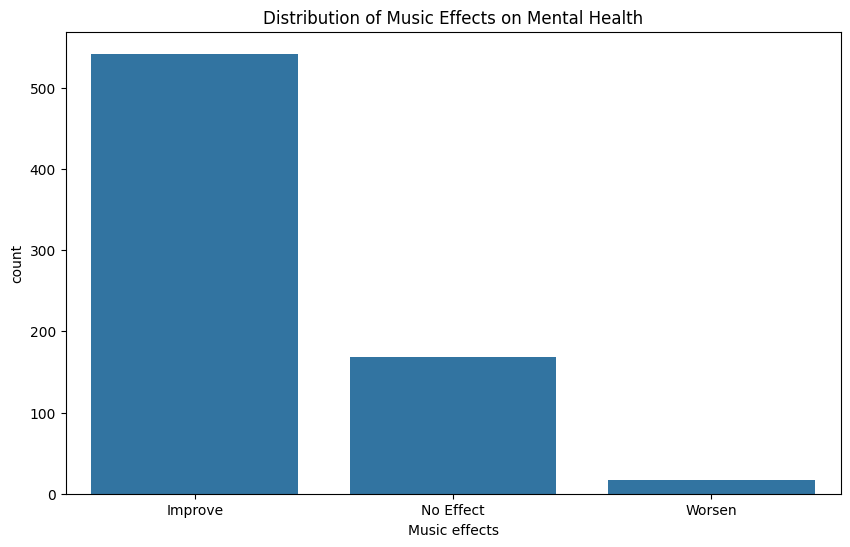

In [163]:
# Distribution of Target Variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Music effects')
plt.title('Distribution of Music Effects on Mental Health')
plt.xticks([0, 1, 2], ['Improve', 'No Effect', 'Worsen'])
plt.show()

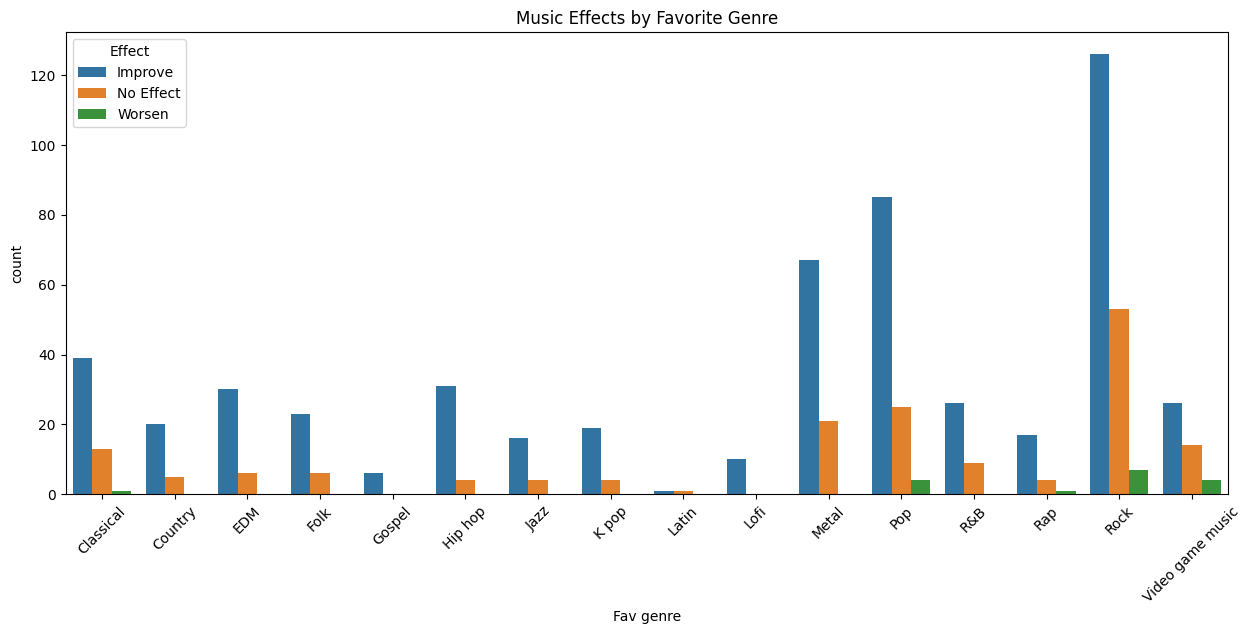

In [165]:
# Music Effects by Genre Preference
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Fav genre', hue='Music effects')
plt.xticks(rotation=45)
plt.title('Music Effects by Favorite Genre')
plt.legend(title='Effect', labels=['Improve', 'No Effect', 'Worsen'])
plt.show()

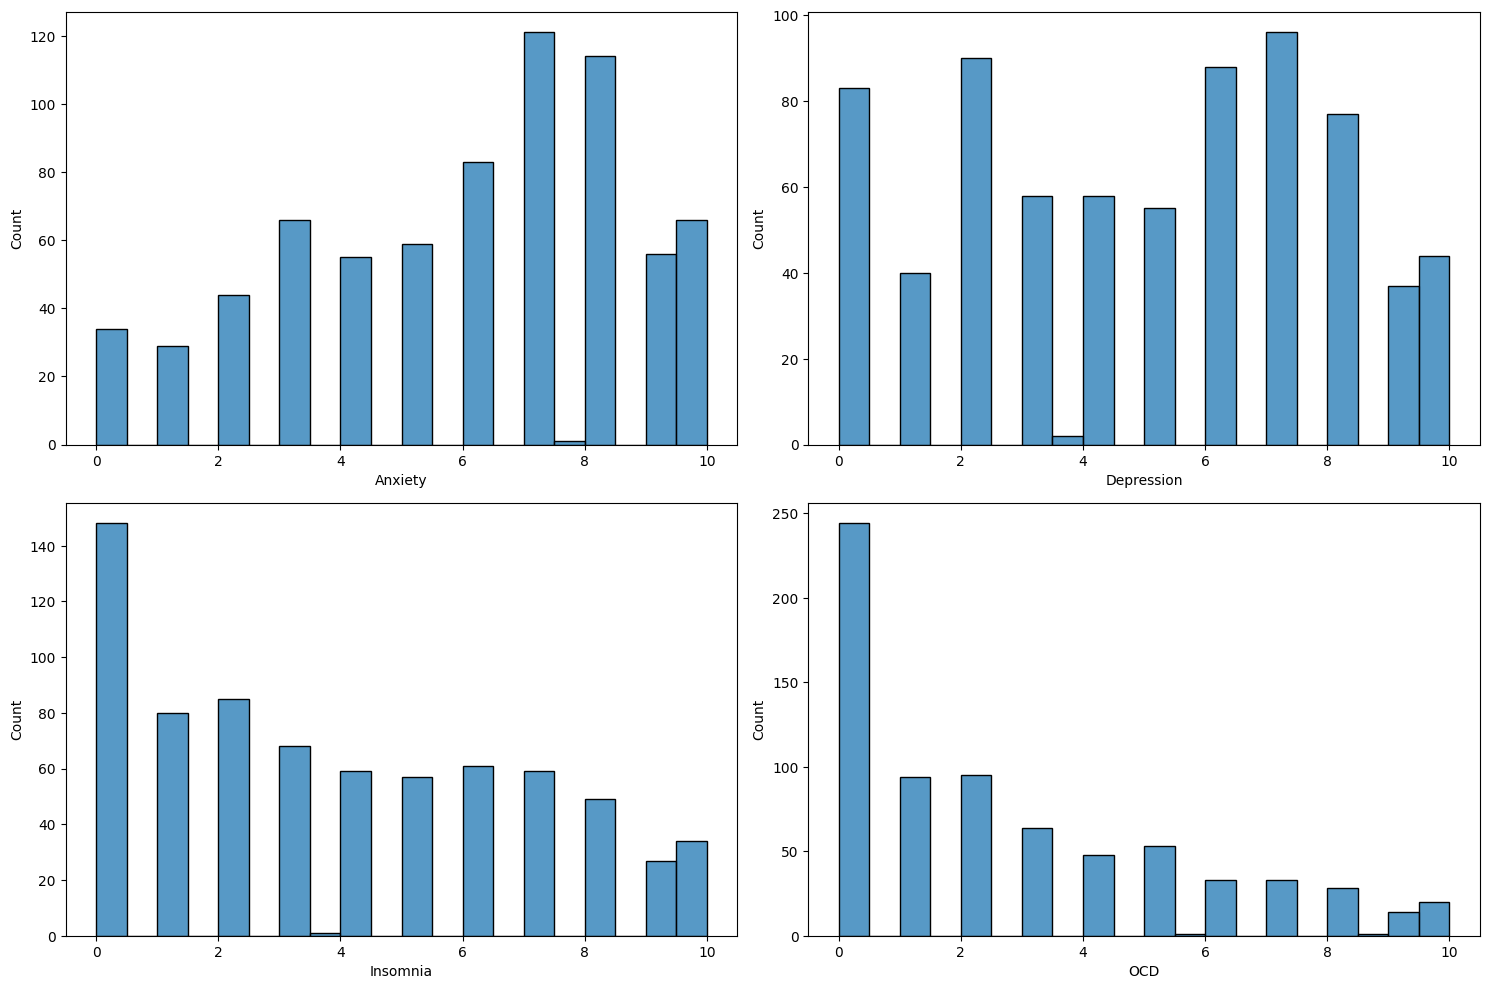

In [168]:
# Mental Health Scores Distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(data=df, x='Anxiety', bins=20, ax=axes[0,0])
sns.histplot(data=df, x='Depression', bins=20, ax=axes[0,1])
sns.histplot(data=df, x='Insomnia', bins=20, ax=axes[1,0])
sns.histplot(data=df, x='OCD', bins=20, ax=axes[1,1])
plt.tight_layout()
plt.show()

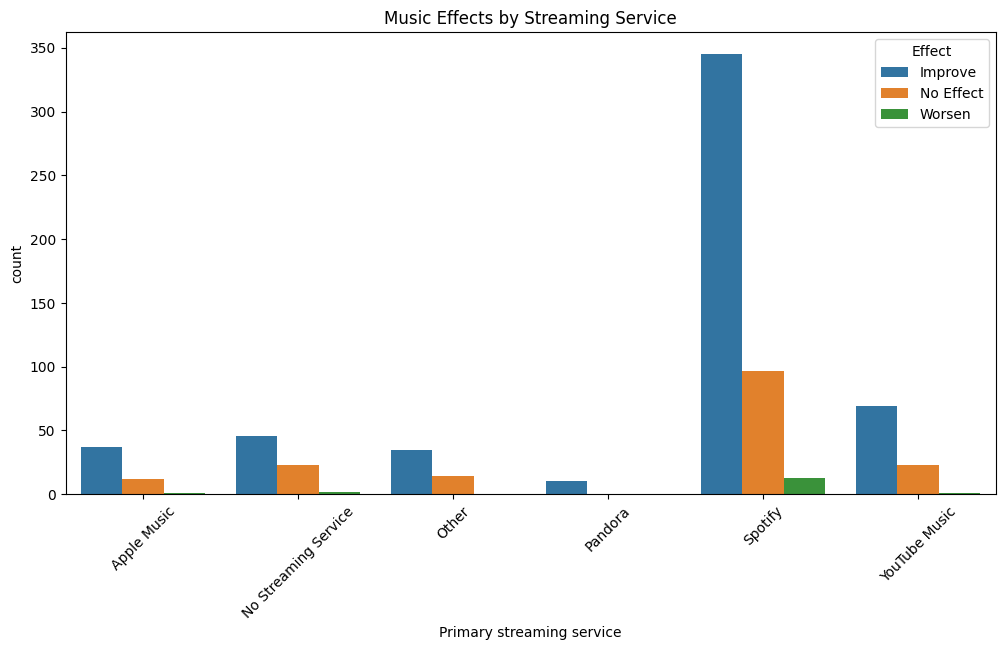

In [179]:
# Streaming Service Preference and Effects
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Primary streaming service', hue='Music effects')
plt.xticks(rotation=45)
plt.title('Music Effects by Streaming Service')
plt.legend(title='Effect', labels=['Improve', 'No Effect', 'Worsen'])
plt.show()

## 1.3. Feature Importance

In [180]:
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,Spotify,4.0,False,False,False,Video game music,False,True,132.0,0,0,3,0,0,1,1,3,0,2,2,1,0,1,1,3,7.0,7.0,10.0,2.0,1
3,61.0,YouTube Music,2.5,True,False,True,Jazz,True,True,84.0,2,0,0,1,2,0,3,2,3,2,0,2,2,0,0,0,9.0,7.0,3.0,3.0,0
4,18.0,Spotify,4.0,True,False,False,R&B,True,False,107.0,0,0,1,0,1,3,0,3,2,2,0,2,3,3,0,1,7.0,2.0,5.0,9.0,0
5,18.0,Spotify,5.0,True,True,True,Jazz,True,True,86.0,1,2,0,0,0,2,3,3,1,3,1,3,3,3,3,0,8.0,8.0,7.0,7.0,0
6,18.0,YouTube Music,3.0,True,True,False,Video game music,True,True,66.0,2,0,1,2,1,1,2,0,1,1,1,1,1,0,0,2,4.0,8.0,6.0,0.0,0


In [182]:
X = df.drop('Music effects', axis=1)
y = df['Music effects']

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
X = pd.get_dummies(X, columns=['Primary streaming service', 'Fav genre'])

In [187]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [188]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

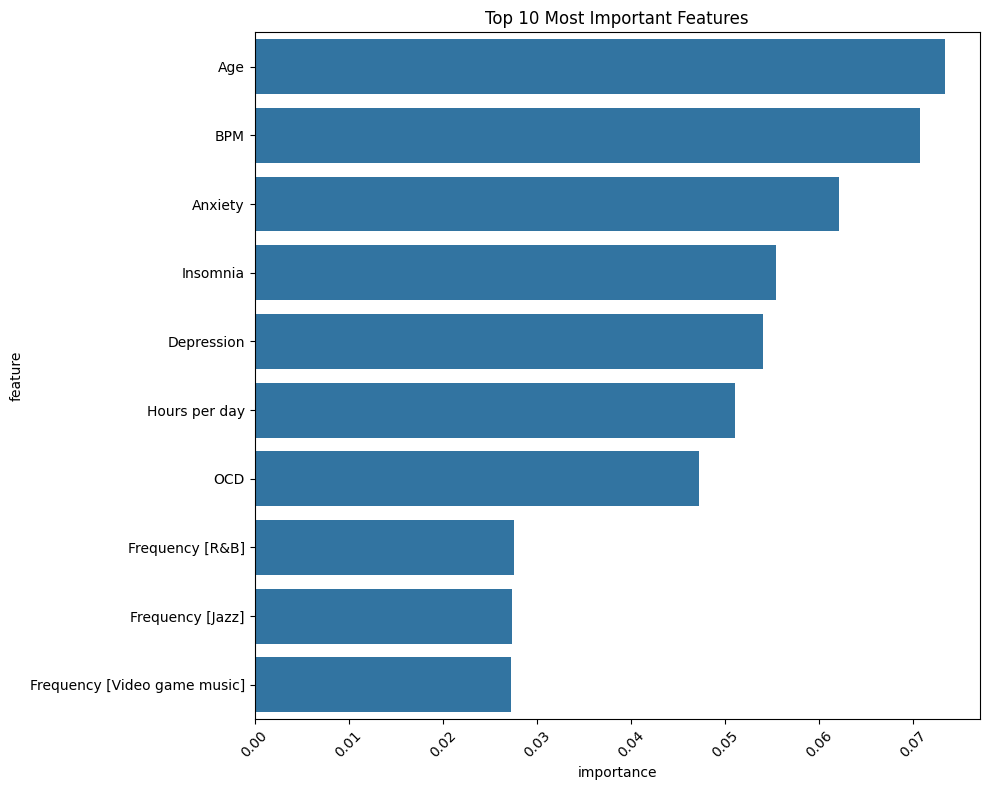

In [194]:
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Model Training

In [195]:
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,Spotify,4.0,False,False,False,Video game music,False,True,132.0,0,0,3,0,0,1,1,3,0,2,2,1,0,1,1,3,7.0,7.0,10.0,2.0,1
3,61.0,YouTube Music,2.5,True,False,True,Jazz,True,True,84.0,2,0,0,1,2,0,3,2,3,2,0,2,2,0,0,0,9.0,7.0,3.0,3.0,0
4,18.0,Spotify,4.0,True,False,False,R&B,True,False,107.0,0,0,1,0,1,3,0,3,2,2,0,2,3,3,0,1,7.0,2.0,5.0,9.0,0
5,18.0,Spotify,5.0,True,True,True,Jazz,True,True,86.0,1,2,0,0,0,2,3,3,1,3,1,3,3,3,3,0,8.0,8.0,7.0,7.0,0
6,18.0,YouTube Music,3.0,True,True,False,Video game music,True,True,66.0,2,0,1,2,1,1,2,0,1,1,1,1,1,0,0,2,4.0,8.0,6.0,0.0,0


In [210]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb

def train_and_evaluate_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'Naive Bayes': GaussianNB(),
        'XGBoost': xgb.XGBClassifier(enable_categorical=True),
        'LightGBM': lgb.LGBMClassifier(enable_categorical=True),
    }

    results = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[model_name] = accuracy

    sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
    
    print("Model Performance (Accuracy Score):")
    for model_name, score in sorted_results:
        print(f"{model_name}: {score:.4f}")
    
    best_model_name, best_score = sorted_results[0]
    print(f"\nBest model: {best_model_name} ({best_score:.4f})")
    
    return models[best_model_name], best_model_name



In [211]:
X.columns = X.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '').str.replace('>', '')


In [212]:
best_model, best_model_name = train_and_evaluate_models(X, y)

C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 311
[LightGBM] [Info] Number of data points in the train set: 582, number of used features: 42
[LightGBM] [Info] Start training from score -0.288828
[LightGBM] [Info] Start training from score -1.476121
[LightGBM] [Info] Start training from score -3.801521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [238]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model = rf.fit(X_train, y_train)

In [244]:
y_pred = rf_model.predict(X_test)

In [245]:
# Classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       106
           1       0.50      0.03      0.05        36
           2       0.00      0.00      0.00         4

    accuracy                           0.73       146
   macro avg       0.41      0.34      0.30       146
weighted avg       0.65      0.73      0.62       146



C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

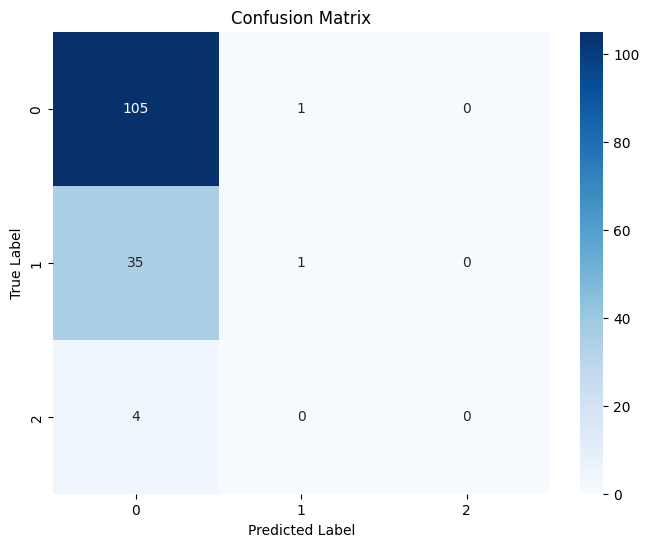

In [246]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [247]:
# Cross-validation score
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())


Cross-validation scores: [0.75342466 0.73972603 0.73287671 0.75172414 0.75172414]
Average CV score: 0.7458951346244685


In [249]:
# Area Under the ROC Curve
from sklearn.metrics import roc_auc_score

y_pred_proba = rf_model.predict_proba(X_test)

auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print(f"AUC-ROC: {auc}")

AUC-ROC: 0.6089782189420111


In [252]:
# Log Ross
from sklearn.metrics import log_loss

logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss}")


Log Loss: 0.8812020320972367


In [256]:
# Matthews Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc}")

Matthews Correlation Coefficient (MCC): 0.06229691254184715


In [257]:
# Save Model
import pickle
pickle.dump(rf_model, open('rf_model.pkl', 'wb'))